In [685]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [797]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import scipy
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error

In [798]:
df=pd.read_csv('insurance.csv')

In [799]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [800]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [801]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<AxesSubplot:>

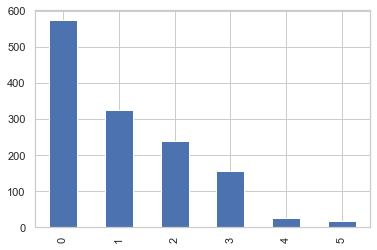

In [802]:
df['children'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='region', ylabel='charges'>

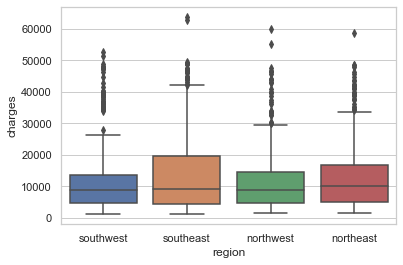

In [803]:
sns.boxplot(x=df['region'],y=df['charges'],data=df)

<AxesSubplot:xlabel='sex', ylabel='charges'>

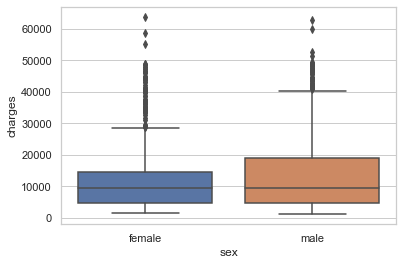

In [804]:
sns.boxplot(x=df['sex'],y=df['charges'],data=df)

<AxesSubplot:xlabel='sex', ylabel='charges'>

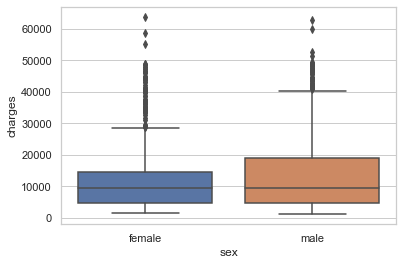

In [805]:
sns.boxplot(x=df['sex'],y=df['charges'],data=df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

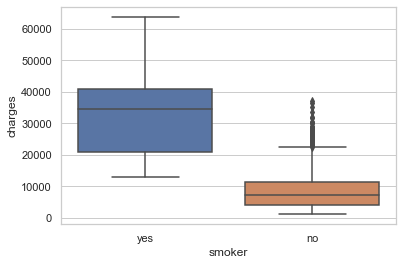

In [806]:
sns.boxplot(x=df['smoker'],y=df['charges'],data=df)

<AxesSubplot:xlabel='children', ylabel='charges'>

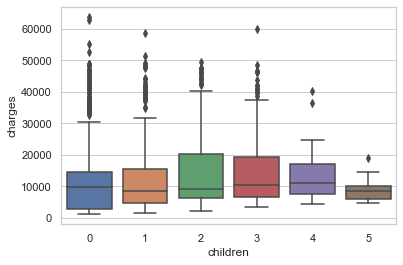

In [807]:
sns.boxplot(x=df['children'],y=df['charges'],data=df)

<AxesSubplot:>

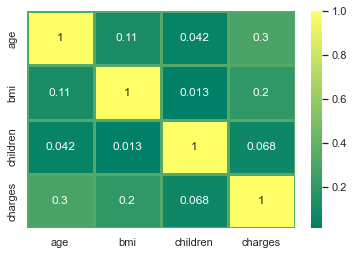

In [808]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='summer',linewidths=1.1,linecolor='g')

In [809]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**We see that there are categorical columns like smoker,children,region we have to convert it into numeric in order to predict the charges**

In [810]:
#dummy variables 
dummy=pd.get_dummies(df['sex'],drop_first=True)

In [811]:
dummy.columns=['Sex']

In [812]:
dummy.head()

,Sex
0,0
1,1
2,1
3,1
4,1


In [813]:
df=pd.concat([df,dummy],axis=1)

In [814]:
df.drop('sex',axis=1,inplace=True)

In [815]:
df.head()

,age,bmi,children,smoker,region,charges,Sex
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1


In [816]:
dummies=pd.get_dummies(df['smoker'])

In [817]:
dummies.drop('no',inplace=True,axis=1)

In [818]:
dummies.columns=['Smoker']

In [819]:
df=pd.concat([df,dummies],axis=1)

In [820]:
df.head()

,age,bmi,children,smoker,region,charges,Sex,Smoker
0,19,27.900,0,yes,southwest,16884.92400,0,1
1,18,33.770,1,no,southeast,1725.55230,1,0
2,28,33.000,3,no,southeast,4449.46200,1,0
3,33,22.705,0,no,northwest,21984.47061,1,0
4,32,28.880,0,no,northwest,3866.85520,1,0


In [821]:
df.drop('smoker',inplace=True,axis=1)

In [822]:
df.head()

,age,bmi,children,region,charges,Sex,Smoker
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


In [823]:
rgion_dummy=pd.get_dummies(df['region'])

In [824]:
rgion_dummy.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [825]:
df=pd.concat([df,rgion_dummy],axis=1)

In [826]:
df.head()

,age,bmi,children,region,charges,Sex,Smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,southwest,16884.92400,0,1,0,0,0,1
1,18,33.770,1,southeast,1725.55230,1,0,0,0,1,0
2,28,33.000,3,southeast,4449.46200,1,0,0,0,1,0
3,33,22.705,0,northwest,21984.47061,1,0,0,1,0,0
4,32,28.880,0,northwest,3866.85520,1,0,0,1,0,0


In [827]:
df.drop('region',axis=1,inplace=True)

In [828]:
df=df.reindex(columns=['age','bmi','children','Sex','Smoker','northeast','northwest','southeast','southwest','charges'])

In [829]:
df.head()

,age,bmi,children,Sex,Smoker,northeast,northwest,southeast,southwest,charges
0,19,27.900,0,0,1,0,0,0,1,16884.92400
1,18,33.770,1,1,0,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,0,1,0,4449.46200
3,33,22.705,0,1,0,0,1,0,0,21984.47061
4,32,28.880,0,1,0,0,1,0,0,3866.85520


<AxesSubplot:>

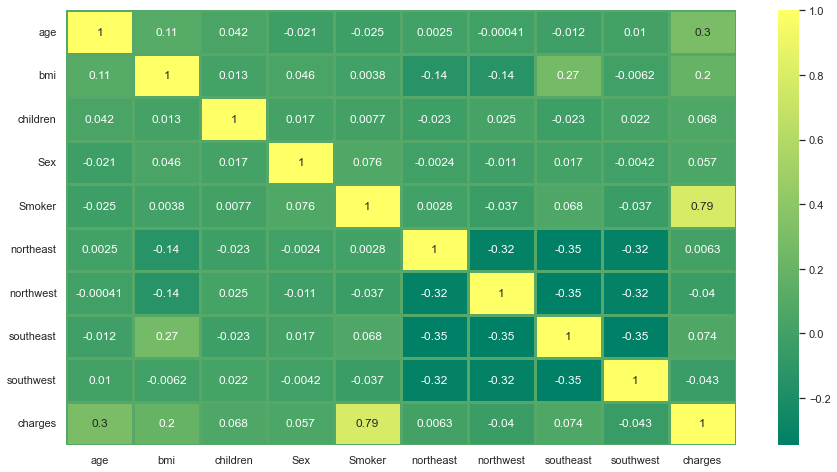

In [830]:
plt.figure(figsize=(15,8))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='summer',linewidths=1.1,linecolor='g')

In [831]:
X=df.drop('charges',axis=1)
y=df['charges']

In [832]:
X = X.drop('Sex', axis=1)

In [833]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [834]:
X_train.shape,y_train.shape

((1070, 8), (1070,))

In [835]:
X_test.shape,y_test.shape

((268, 8), (268,))

In [836]:
import pandas as pd
import statsmodels.api as sm
X = sm.add_constant(X)

# Fit the model to the data
model = sm.OLS(y, X).fit()

# Print a summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:30:48   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.006e+04    774.464    -12.991      0.0

In [837]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

X = sm.add_constant(X)

model = sm.formula.ols(formula='charges ~ age + bmi + children + Smoker + northeast + northwest + southeast + southwest', data=df).fit()

# Print a summary of the model
print(model.summary())

# Compute the ANOVA table>
anova_table = anova_lm(model)

# Print the ANOVA table
print(anova_table)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:30:48   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.006e+04    774.464    -12.991      0.0

In [838]:
y_pred = model.predict(X)

# Create a DataFrame with actual and predicted values
results = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

# Print the table
print(results.head(10))

        Actual     Predicted
0  16884.92400  25217.897406
1   1725.55230   3512.165759
2   4449.46200   6770.262752
3  21984.47061   3827.056827
4   3866.85520   5661.337382
5   3756.62160   3658.778822
6   8240.58960  10595.666738
7   7281.50560   7983.827016
8   6406.41070   8569.251751
9  28923.13692  11827.057193


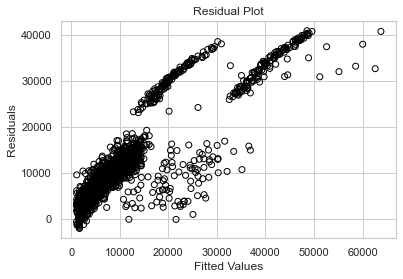

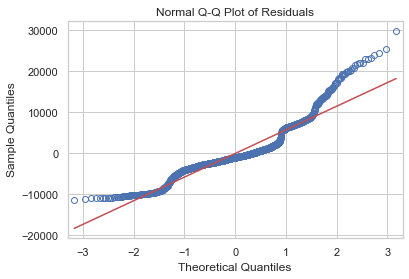

In [860]:
y = df['charges']
X = df[['age', 'bmi', 'children', 'Smoker', 'northeast', 'northwest', 'southeast', 'southwest']]

# Fit the linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Obtain the residuals
residuals = model.resid

# Plot the residuals against the predicted values
plt.scatter(y,y_pred,facecolors='none', edgecolors='black')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


import matplotlib.pyplot as plt
import statsmodels.graphics.gofplots as smg

smg.qqplot(residuals, line='r', markerfacecolor='none')
plt.title('Normal Q-Q Plot of Residuals')
plt.show()

In [840]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [841]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [842]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [843]:
print(np.sqrt(mean_squared_error(y_test,pred)))

5796.766728796432


In [844]:
print(r2_score(y_test,pred))

0.7835569786290856


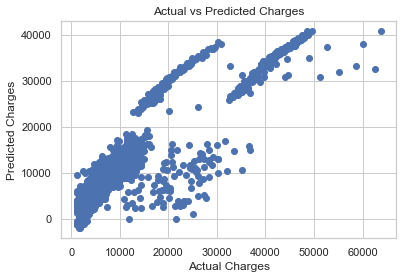

In [845]:
plt.scatter(y, model.fittedvalues)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()

<AxesSubplot:xlabel='charges'>

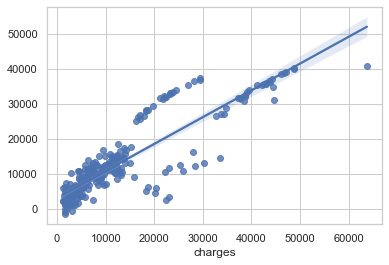

In [846]:
sns.regplot(x=y_test,y=pred)

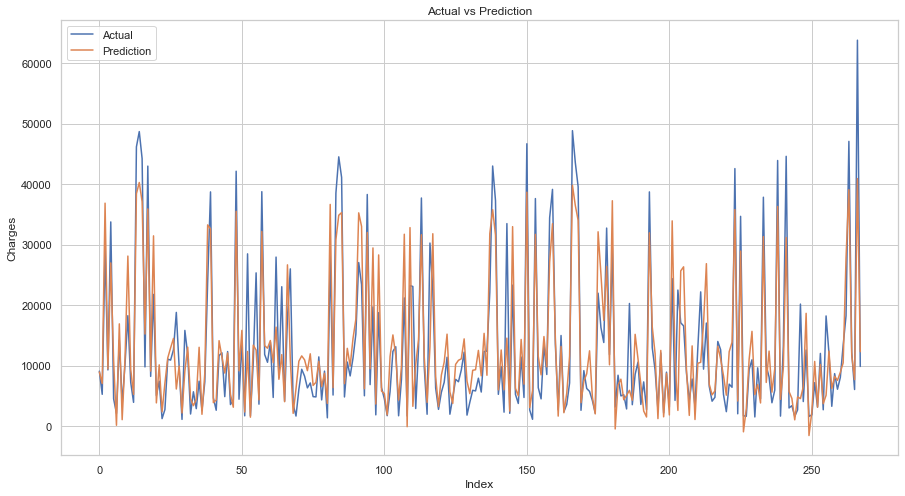

In [847]:
c=[i for i in range(0,268)]
plt.figure(figsize=(15,8))
plt.plot(c,y_test)
plt.plot(c,pred)
plt.xlabel('Index')
plt.ylabel('Charges')
plt.title('Actual vs Prediction')
plt.legend(['Actual','Prediction'])
plt.show()

In [848]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)

In [849]:
print(np.sqrt(mean_squared_error(y_test,pred)))

4537.670998356821


In [850]:
print(r2_score(y_test,pred))

0.8673711669559139


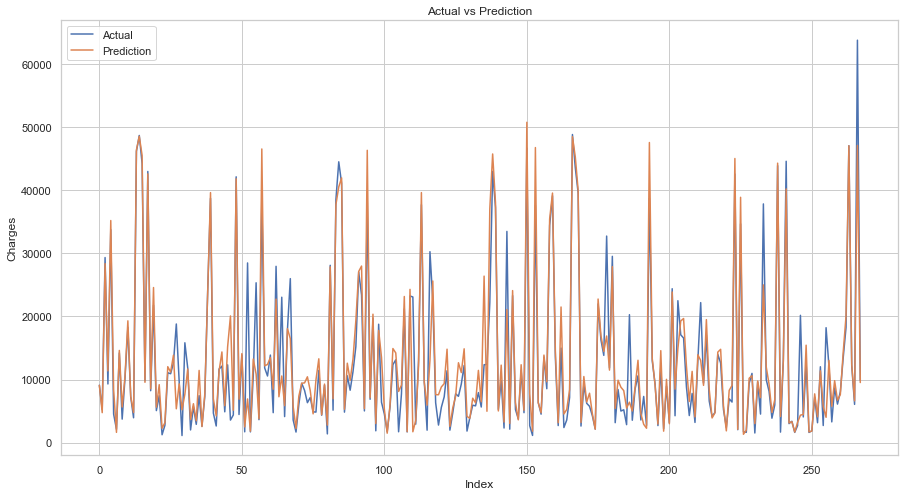

In [851]:
c=[i for i in range(0,268)]
plt.figure(figsize=(15,8))
plt.plot(c,y_test)
plt.plot(c,pred)
plt.xlabel('Index')
plt.ylabel('Charges')
plt.title('Actual vs Prediction')
plt.legend(['Actual','Prediction'])
plt.show()

In [852]:
xg=XGBRegressor()
xg.fit(X_train,y_train)
pred=xg.predict(X_test)

NameError: name 'XGBRegressor' is not defined

In [853]:
print(np.sqrt(mean_squared_error(y_test,pred)))

4537.670998356821


In [854]:
print(r2_score(y_test,pred))

0.8673711669559139


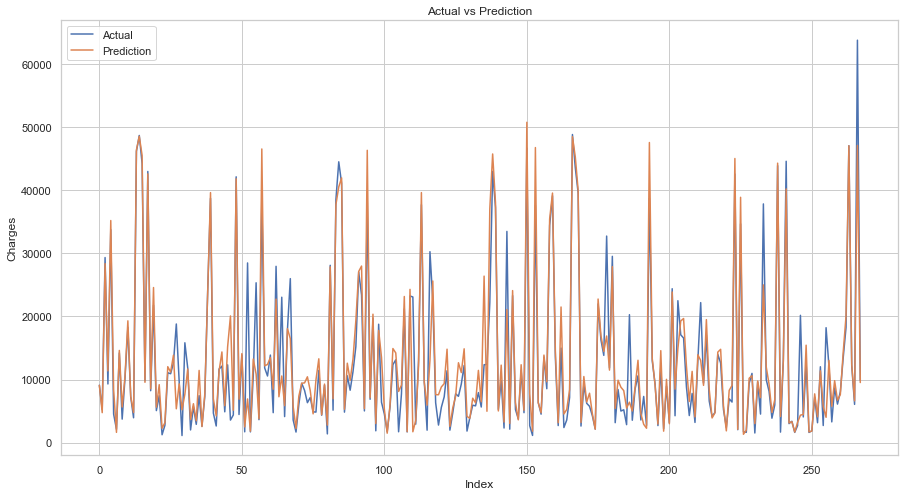

In [856]:
c=[i for i in range(0,268)]
plt.figure(figsize=(15,8))
plt.plot(c,y_test)
plt.plot(c,pred)
plt.xlabel('Index')
plt.ylabel('Charges')
plt.title('Actual vs Prediction')
plt.legend(['Actual','Prediction'])
plt.show()